In [1]:
import numpy as np
import pyemma.msm as msm
import msmtools.generation as msmgen
import msmtools.analysis as msmana
import pyemma.coordinates as coor
import matplotlib.pylab as plt
import anca
%pylab inline
plt.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


/Users/fxp/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
def assign(X, cc):
    T = X.shape[0]
    I = np.zeros((T),dtype=int)
    for t in range(T):
        dists = X[t] - cc
        dists = dists ** 2
        I[t] = np.argmin(dists)
    return I

In [3]:
P = np.array([[0.99, 0.01], 
              [0.01, 0.99]]);
T = 50000
means = [np.array([-1,1]), np.array([1,-1])];
widths = [np.array([0.3,2]),np.array([0.3,2])];

In [4]:
# continuous trajectory
X = np.zeros((T, 2))
# hidden trajectory
dtraj = msmgen.generate_traj(P, T)
for t in range(T):
    s = dtraj[t]
    X[t,0] = widths[s][0] * numpy.random.randn() + means[s][0]
    X[t,1] = widths[s][1] * numpy.random.randn() + means[s][1]    

/Users/fxp/anaconda2/lib/python2.7/site-packages/pyemma/__init__.py:91: UserWarning: You are not using the latest release of PyEMMA. Latest is 2.4, you have 2.3.2.
  .format(latest=latest, current=current), category=UserWarning)


In [5]:
dtraj.shape

(50000,)

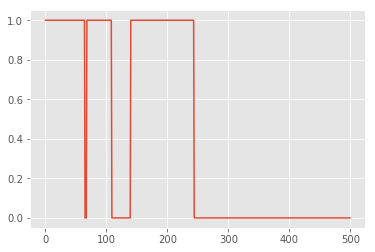

In [6]:
plt.plot(dtraj[0:500]);

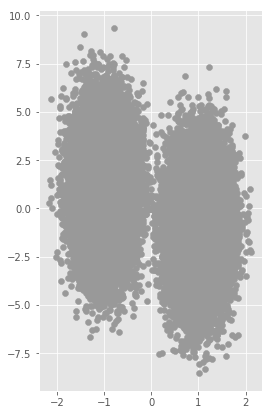

In [7]:
plt.figure(figsize=(4,7))
plt.scatter(X[:,0], X[:,1], marker = 'o', color=[0.6,0.6,0.6])

## Spatial Decorrelation of Order 2 (SD2) 

Parameters:
               
               data – a 3n x T data matrix (number 3 is due to the x,y,z coordinates for each atom). Maybe a numpy   
               array or a matrix where,
               
               n: size of the protein 
               
               T: number of snapshots of MD trajectory
               
               m – dimensionality of the subspace we are interested in; Default value is None, in which case m = n
               verbose – print information on progress. Default is true.

Returns:

               A 3n x m matrix U (NumPy matrix type), such that Y = U * data is a 2nd order spatially whitened                        
               coordinates extracted from the 3n x T data matrix. If m is omitted, U is a square 3n x 3n matrix.
               
               Ds: has eigen values sorted by increasing variance
               
               PCs: holds the index for m most significant principal components by decreasing variance S = Ds[PCs] 
    
               S – Eigen values of the ‘data’ covariance matrix
      
               B – Eigen vectors of the ‘data’ covariance matrix. The eigen vectors are orthogonal.  




In [8]:
import SD2
(Y, S, B, U) = SD2.SD2(X, m=2);

2nd order Spatial Decorrelation -> Looking for 2 sources
2nd order Spatial Decorrelation -> Removing the mean value
2nd order Spatial Decorrelation -> Whitening the data


## Temporal Decorrelation of Order 2 (TD2) 

Parameters:
    
        Y -- an mxT spatially whitened matrix (m dimensionality of subspace, T snapshots). May be a numpy 
             
             array or a matrix where,
             
        m -- dimensionality of the subspace we are interested in. Defaults to None, in
                which case m=n.
        T -- number of snapshots of MD trajectory
        
        U -- whitening matrix obtained after doing the PCA analysis on m components
                of real data
        
        lag -- lag time in the form of an integer denoting the time steps
        
        verbose -- print info on progress. Default is True.
    
Returns:

      	V -- An n x m matrix V (NumPy matrix type) is a separating matrix such that V = Btd2 x U 
        (U is obtained from SD2 of data matrix and Btd2 is obtained from time-delayed covariance of matrix Y)   
      
        Z -- Z = B2td2 * Y is spatially whitened and temporally decorrelated (2nd order) source extracted from 
        the m x T spatially whitened matrix Y.        

        Dstd2: has eigen values sorted by increasing variance

        PCstd2: holds the index for m most significant principal components by decreasing variance
        R = Dstd2[PCstd2] 

        R – Eigen values of the time-delayed covariance matrix of Y
  
        Btd2 – Eigen vectors of the time-delayed covariance matrix of Y
  




In [9]:
import TD2
(Z, R, Btd2, V) = TD2.TD2(Y, m=2, U=U, lag=5)

2nd order Temporal Decorrelation -> Looking for 2 sources
2nd order Temporal Decorrelation -> Removing the mean value
2nd order Temporal Decorrelation -> Whitening the data


## Temporal Decorrelation of Order 4 (TD4) 

Parameters:
    
        Z -- an mxT spatially uncorrelated of order 2 and temporally uncorrelated 
        of order 2 matrix (m subspaces, T samples). May be a  numpyarray or matrix where                  
                m: number of subspaces we are interested in.
                T: Number of snapshots of MD trajectory
        
        V -- separating matrix obtained after doing the PCA analysis on m components
              of real data followed temporal decorrelation of the spatially whitened 
              data
        
        lag -- lag time in the form of an integer denoting the time steps
        
        verbose -- print info on progress. Default is True.
    
Returns:
    
        W -- separating matrix    







In [10]:
import TD4
W = TD4.TD4(Z, m=2, V=V, lag=5)

4th order Temporal Decorrelation -> Estimating cumulant matrices
TD4 -> Contrast optimization by joint diagonalization
TD4 -> Sweep #  0 completed in 1 rotations
TD4 -> Sweep #  1 completed in 0 rotations
TD4 -> Total of 1 Givens rotations
TD4 -> Sorting the components
TD4 -> Fixing the signs
(2, 2)


In [11]:
def draw_arrow(a, v, color):
    plt.arrow(0, 0, a*v[0], a*v[1], color=color, width=0.02, linewidth=3)

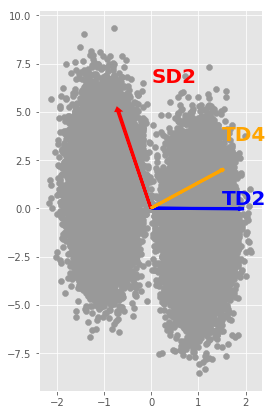

In [12]:
plt.figure(figsize=(4,7))
scatter(X[:,0], X[:,1], marker = 'o', color=[0.6,0.6,0.6])

plt.arrow(0, 0, 7*U[0,0], 12*U[0,1], color='red', width=0.02, linewidth=3);
plt.text(-0.0, 6.5, 'SD2', color='red', fontsize=20, fontweight='bold', rotation='horizontal')

plt.arrow(0, 0, 2*V[0,0], V[0,1], color='blue', width=0.02, linewidth=3);
plt.text(1.5, 0.2, 'TD2', color='blue', fontsize = 20, fontweight='bold', rotation='horizontal')

plt.arrow(0, 0, 3*W[0,0], 4*W[0,1], color='orange', width=0.02, linewidth=3);
plt.text(1.5, 3.5, 'TD4', color='orange', fontsize=20, fontweight='bold', rotation='horizontal')



In [13]:
YTD4 = W.dot(Z)

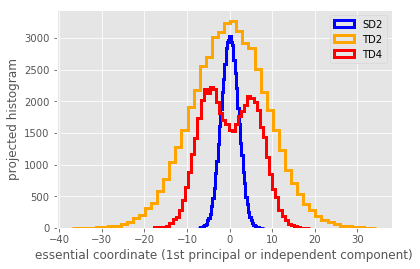

In [14]:
hist(2*Y[0,:].T, bins=50, histtype='step', linewidth=3, label='SD2', color='blue')
hist(0.3*Z[1,:].T, bins=50, histtype='step', linewidth=3, label='TD2', color='orange')
hist(5*YTD4[1,:].T, bins=50, histtype='step', linewidth=3, label='TD4', color='red')

xlabel('essential coordinate (1st principal or independent component)')
ylabel('projected histogram')
legend()